In [33]:
using Compose
function Circle(x,y,diameter,fillin)
    composition = compose(context(), circle(x,y,diameter), fill(string(fillin)))
   #     "compose(context(),circle(.5,.5,.1))
     color = string("\"",string(fillin),"\"")
    tag = string("circle(",string(x),",",string(y),',',diameter,"), fill(", color , "),")
    println(color)
    tree() = introspect(composition)
    show() = composition
    x = x
    y = y
    update(x,y) =  string("circle(",string(x),",",string(y),',',diameter,"), fill(", color , "),")
    (var)->(show;composition;tree;tag;x;y;update;diameter)
end


function Scatter(x,y,shape,debug=false)
   topx = maximum(x)
    topy = maximum(y)
    axisx = Line([(-1,-1), (-1,1), (1,1)],:blue)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(0,0), (0,1), (0,1)],:blue)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    x = [z = z / topx for z in x]
    y = [z = z / topy for z in y]
    expression = string("compose(context()", ",", axisx_tag, axisy_tag)
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        exp = shape.update(i,w)
        expression = string(expression,string(exp))
    end
    expression = Meta.parse(string(expression,")"))
    if debug == true println(expression) end
    composition = eval(expression)
    show() = composition
    tree() = introspect(composition)
    (var)->(show;composition;tree)
end


function Line(pairs, color)
    tree() = introspect(composition)
    show() = composition
    composition = compose(context(), line(pairs), stroke(string(color)))
    color = string("\"",string(color),"\"")
    pairstring = ""
    for i in pairs
        s = string(i) * ","
        pairstring = pairstring * s
    end
    update(pairs) = string("line([",string(join(pairstring)),"]), stroke(", color, "),")
    (var)->(show;composition;tree;update;color;pairs)
end

Line (generic function with 1 method)

In [34]:
using CSV
using DataFrames
df = CSV.read("weatherHistory.csv")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C)
,String,String,String,Float64,Float64
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47222,7.38889
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.35556,7.22778
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.37778,9.37778
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28889,5.94444
5,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.75556,6.97778
6,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.22222,7.11111
7,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.73333,5.52222
8,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.77222,6.52778
9,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.8222,10.8222


In [35]:
show(df, allcols=true)

96453×12 DataFrame
│ Row   │ Formatted Date                │ Summary       │ Precip Type │
│       │ String                        │ String        │ String      │
├───────┼───────────────────────────────┼───────────────┼─────────────┤
│ 1     │ 2006-04-01 00:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 2     │ 2006-04-01 01:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 3     │ 2006-04-01 02:00:00.000 +0200 │ Mostly Cloudy │ rain        │
│ 4     │ 2006-04-01 03:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 5     │ 2006-04-01 04:00:00.000 +0200 │ Mostly Cloudy │ rain        │
│ 6     │ 2006-04-01 05:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 7     │ 2006-04-01 06:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 8     │ 2006-04-01 07:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 9     │ 2006-04-01 08:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 10    │ 2006-04-01 09:00:00.000 +0200 │ Partly Cloudy │ rain        │
⋮
│ 96443 │ 2016-09-09 13:00:00.000 +0200 │ P

In [36]:
x = df[Symbol("Wind Speed (km/h)")]
y = df[Symbol("Temperature (C)")]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[36]:1
└ @ Core In[36]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[36]:2
└ @ Core In[36]:2


96453-element CSV.Column{Float64,Float64}:
  9.472222222222221
  9.355555555555558
  9.377777777777778
  8.28888888888889 
  8.755555555555553
  9.222222222222221
  7.733333333333334
  8.77222222222222 
 10.82222222222222 
 13.77222222222222 
 16.016666666666666
 17.144444444444446
 17.800000000000004
  ⋮                
 28.86666666666666 
 30.99444444444445 
 30.894444444444446
 31.083333333333332
 31.083333333333332
 30.766666666666666
 28.838888888888885
 26.016666666666666
 24.583333333333332
 22.03888888888889 
 21.522222222222222
 20.438888888888894

In [37]:
shape = Circle(.5,.5,.01,:lightblue)

"lightblue"


#21 (generic function with 1 method)

In [38]:
limit = 700
counter = 0
list = []
for i in x
    counter = counter + 1
    if counter < limit
       append!(list,i) 
    end
end
x = list

699-element Array{Any,1}:
 14.1197            
 14.2646            
  3.9284000000000003
 14.1036            
 11.0446            
 13.9587            
 12.3648            
 14.1519            
 11.3183            
 12.525800000000002 
 17.5651            
 19.7869            
 21.944300000000002 
  ⋮                 
  9.4829            
 10.384500000000001 
 12.203800000000001 
 12.445300000000001 
  9.837100000000001 
  7.647500000000001 
  9.7405            
  6.745900000000001 
  6.2146            
  6.4078            
  6.601             
 13.379100000000001 

In [39]:
limit = 700
counter = 0
list = []
for i in y
    counter = counter + 1
    if counter < limit
       append!(list,i) 
    end
end
y = list

699-element Array{Any,1}:
  9.472222222222221
  9.355555555555558
  9.377777777777778
  8.28888888888889 
  8.755555555555553
  9.222222222222221
  7.733333333333334
  8.77222222222222 
 10.82222222222222 
 13.77222222222222 
 16.016666666666666
 17.144444444444446
 17.800000000000004
  ⋮                
 12.916666666666666
 13.88888888888889 
 13.02222222222222 
 12.383333333333333
 10.205555555555556
  9.144444444444446
  7.827777777777779
  7.733333333333334
  7.144444444444444
  6.016666666666666
  5.46111111111111 
  8.244444444444447

In [40]:
@time plot = Scatter(x,y,shape)

  0.318235 seconds (514.25 k allocations: 62.847 MiB, 5.58% gc time)


#28 (generic function with 1 method)

  0.002621 seconds (536 allocations: 34.385 KiB)


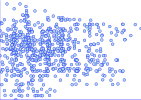

In [41]:
@time plot.show()

In [49]:
using Base.Threads
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    d = Circle(i,.5,.01,:yellow)
    d.show()
end

"yellow"
"yellow"
"yellow"
"yellow"
"yellow"
"yellow"
"yellow"
"yellow"
"yellow"


In [43]:
using Plots